<a href="https://colab.research.google.com/github/rafabandoni/nfl-predict/blob/main/notebooks/01_nfl_predict_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

# 01. EDA (Exploratory data analysis)
- Understanding data
- Time Series
- Distribution
- Dispersion
- Correlation

## Load data

In [3]:
PATH = 'https://raw.githubusercontent.com/rafabandoni/nfl-predict/refs/heads/main/data/output/'

In [4]:
games_score_df = pd.read_parquet(PATH + 'games_stats_nfl.parquet')
games_score_df.head()

schedule_date  schedule_season  schedule_playoff  team_home  score_home  \
0    2011-09-08             2011             False    Packers          42   
1    2011-09-11             2011             False  Cardinals          28   
2    2011-09-11             2011             False     Ravens          35   
3    2011-09-11             2011             False      Bears          30   
4    2011-09-11             2011             False     Browns          17   

   score_away team_away  stadium_neutral  home_winner  \
0          34    Saints            False         True   
1          21  Panthers            False         True   
2           7  Steelers            False         True   
3          12   Falcons            False         True   
4          27   Bengals            False        False   

   defense_downs_3rd_att_home_  defense_downs_3rd_md_home_  \
0                          213                          77   
1                          233                          87   
2                          229                          87   
3                          216                          75   
4                          224                          96   

   defense_downs_4th_att_home_  defense_downs_4th_md_home_  \
0                           20                           6   
1                           17                           9   
2                           12                           6   
3                           13                           6   
4                           15                          11   

   defense_downs_rec_1st_home_  defense_downs_rec_1st_perc_home_  \
0                          163                             0.551   
1                          178                             0.549   
2                          187                             0.536   
3                          183                             0.504   
4                          195                             0.631   

   defense_downs_rush_1st_home_  defense_downs_rush_1st_perc_home_  \
0                            82                              0.208   
1                           123                              0.234   
2                            79                              0.206   
3                            88                              0.228   
4                           102                              0.202   

   defense_downs_scrm_plys_home_  year_home_  defense_fumbles_ff_home_  \
0                            969        2011                        15   
1                           1092        2011                        13   
2                           1007        2011                        15   
3                           1002        2011                        23   
4                           1041        2011                         9   

   defense_fumbles_fr_home_  defense_fumbles_fr_td_home_  \
0                         8                            1   
1                        13                            4   
2                         8                            0   
3                        13                            0   
4                         9                            1   

   defense_fumbles_rec_fum_home_  defense_fumbles_rush_fum_home_  \
0                              5                               6   
1                              4                              10   
2                              7                              10   
3                              6                              15   
4                              1                               4   

   defense_interceptions_int_home_  defense_interceptions_int_td_home_  \
0                               24                                   3   
1                               17                                   3   
2                               19                                   3   
3                               21                                   1   
4                               19 

## Data understanding

In [5]:
games_score_df.describe()

schedule_date  schedule_season   score_home  \
count                           3811      3811.000000  3811.000000   
mean   2018-06-14 06:05:23.064812288      2017.594595    23.891105   
min              2011-09-08 00:00:00      2011.000000     0.000000   
25%              2014-11-16 00:00:00      2014.000000    17.000000   
50%              2018-09-23 00:00:00      2018.000000    24.000000   
75%              2021-12-05 00:00:00      2021.000000    30.000000   
max              2025-02-09 00:00:00      2024.000000    70.000000   
std                              NaN         4.053146    10.237877   

        score_away  defense_downs_3rd_att_home_  defense_downs_3rd_md_home_  \
count  3811.000000                  3811.000000                 3811.000000   
mean     21.730255                   212.673052                   83.217003   
min       0.000000                   176.000000                   47.000000   
25%      15.000000                   203.000000                   76.000000   
50%      21.000000                   213.000000                   83.000000   
75%      28.000000                   222.000000                   89.000000   
max      59.000000                   250.000000                  111.000000   
std       9.794566                    13.041913                    9.881390   

       defense_downs_4th_att_home_  defense_downs_4th_md_home_  \
count                  3811.000000                 3811.000000   
mean                     17.727893                    8.894253   
min                       4.000000                    0.000000   
25%                      13.000000                    6.000000   
50%                      17.000000                    9.000000   
75%                      21.000000                   11.000000   
max                      41.000000                   22.000000   
std                       6.528332                    4.060513   

       defense_downs_rec_1st_home_  defense_downs_rec_1st_perc_home_  \
count                  3811.000000                       3811.000000   
mean                    193.552873                          0.548541   
min                     136.000000                          0.443000   
25%                     181.000000                          0.522000   
50%                     192.000000                          0.548000   
75%                     206.000000                          0.575000   
max                     253.000000                          0.661000   
std                      20.487869                          0.038210   

       defense_downs_rush_1st_home_  defense_downs_rush_1st_perc_home_  \
count                   3811.000000                        3811.000000   
mean                     100.362110                           0.230858   
min                       53.000000                           0.150000   
25%                       88.000000                           0.210000   
50%                      100.000000                           0.232000   
75%                      111.000000                           0.249000   
max                      151.000000                           0.304000   
std                       18.211158                           0.028472   

       defense_downs_scrm_plys_home_   year_home_  defense_fumbles_ff_home_  \
count                    3811.000000  3811.000000               3811.000000   
mean                     1032.931514  2017.594595                 13.855156   
min                       921.000000  2011.000000                  4.000000   
25%                       998.000000  2014.000000                 11.000000   
50%                      1030.000000  2018.000000                 14.000000   
75%                      1067.000000  2021.000000                 16.000000   
max                      1201.000000  2024.000000                 34.000000   
std                        46.930258     4.053146                  4.157088   

       defense_fumbles_fr_home_  defense_fumbles_fr_td_ho

### Creating new columns

In [6]:
# Total points per game
games_score_df['total_score'] = games_score_df['score_home'] + games_score_df['score_away']

## Barplot

<ipython-input-7-52d605fbfff1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['home_wins'] = df['home_winner'].map({True : 1, False : 0})
<ipython-input-7-52d605fbfff1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['away_wins'] = df['home_winner'].map({True : 0, False : 1})


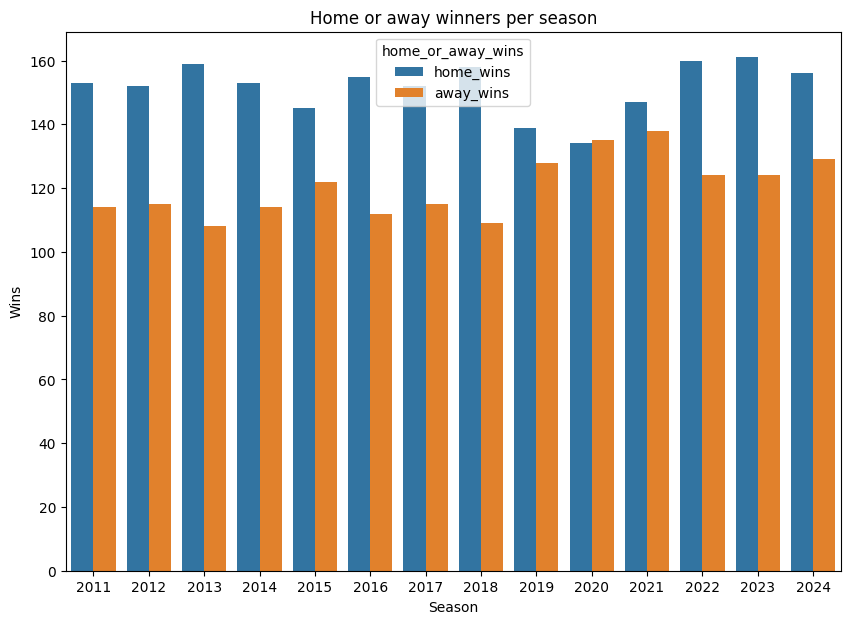

In [7]:
df = games_score_df[['schedule_season',
                     'home_winner']]
df['home_wins'] = df['home_winner'].map({True : 1, False : 0})
df['away_wins'] = df['home_winner'].map({True : 0, False : 1})
df = df.groupby('schedule_season', as_index=False).sum(numeric_only=True)
dfm = pd.melt(df[['schedule_season', 'home_wins', 'away_wins']], id_vars="schedule_season", var_name='home_or_away_wins', value_name='wins')

plt.figure(figsize=(10,7))
sns.barplot(
    data=dfm,
    x='schedule_season',
    y='wins',
    hue='home_or_away_wins'
)
plt.title('Home or away winners per season')
plt.ylabel('Wins')
plt.xlabel('Season')
plt.show()

## Correlation

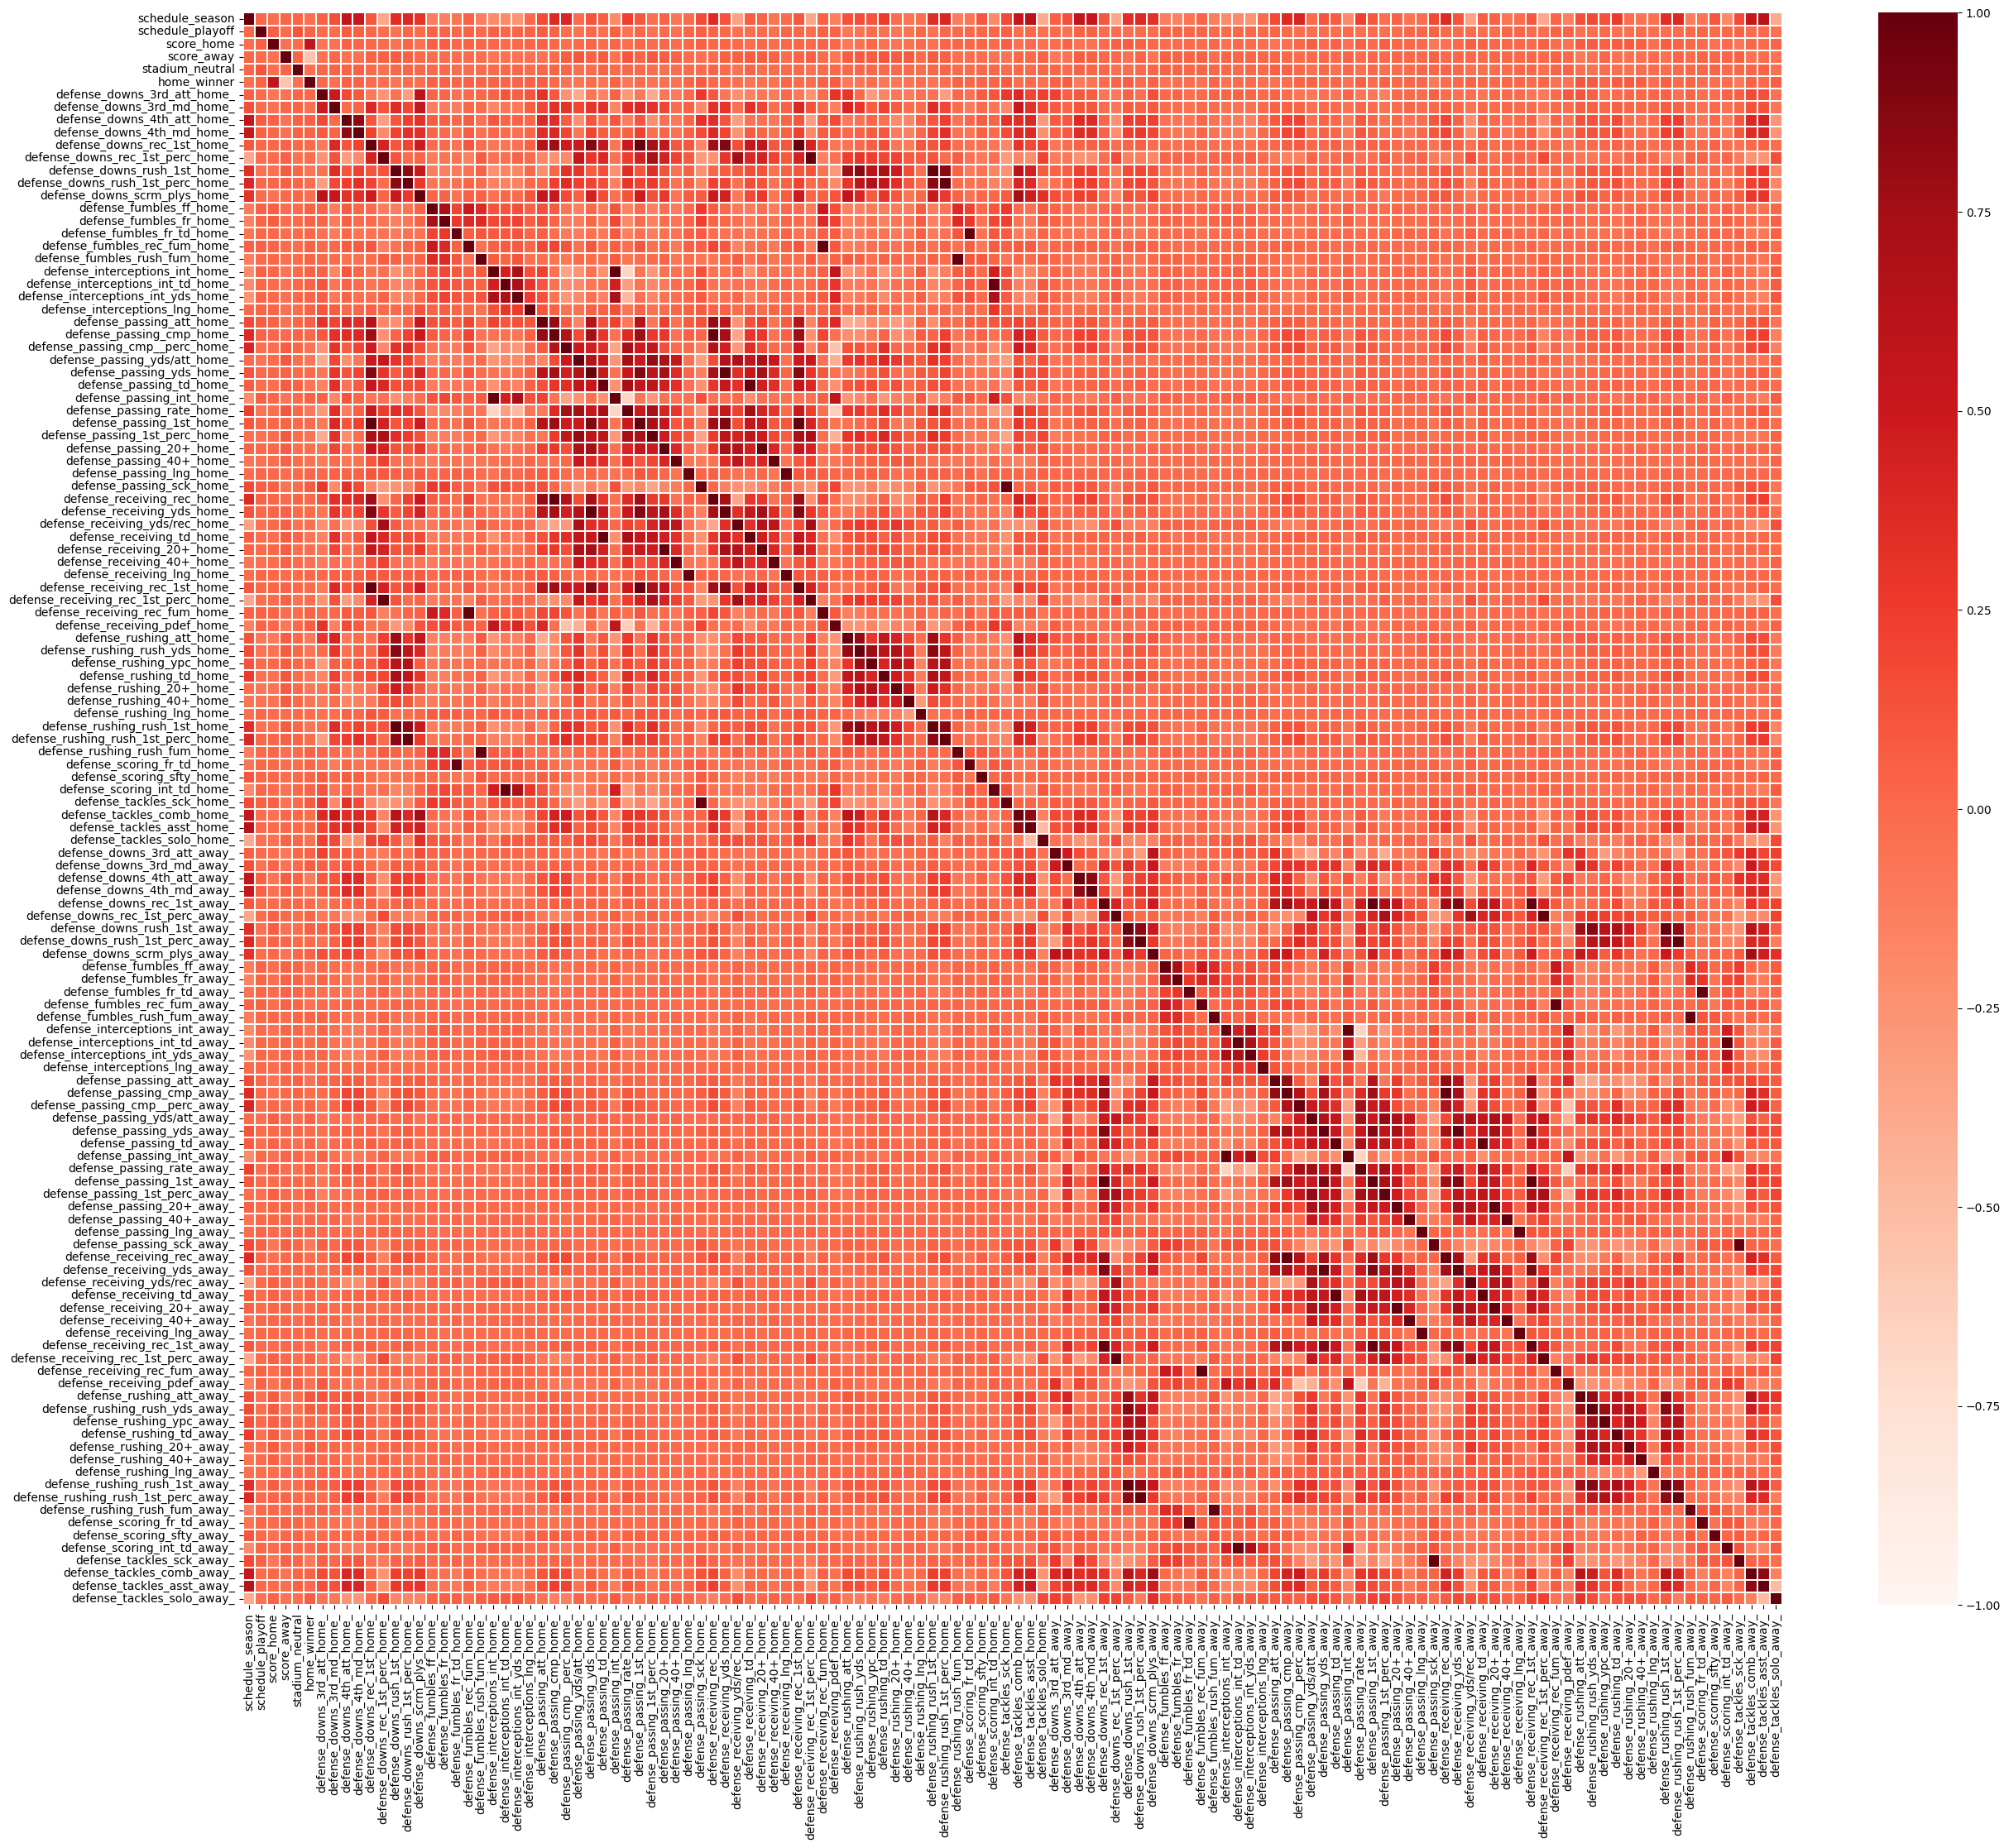

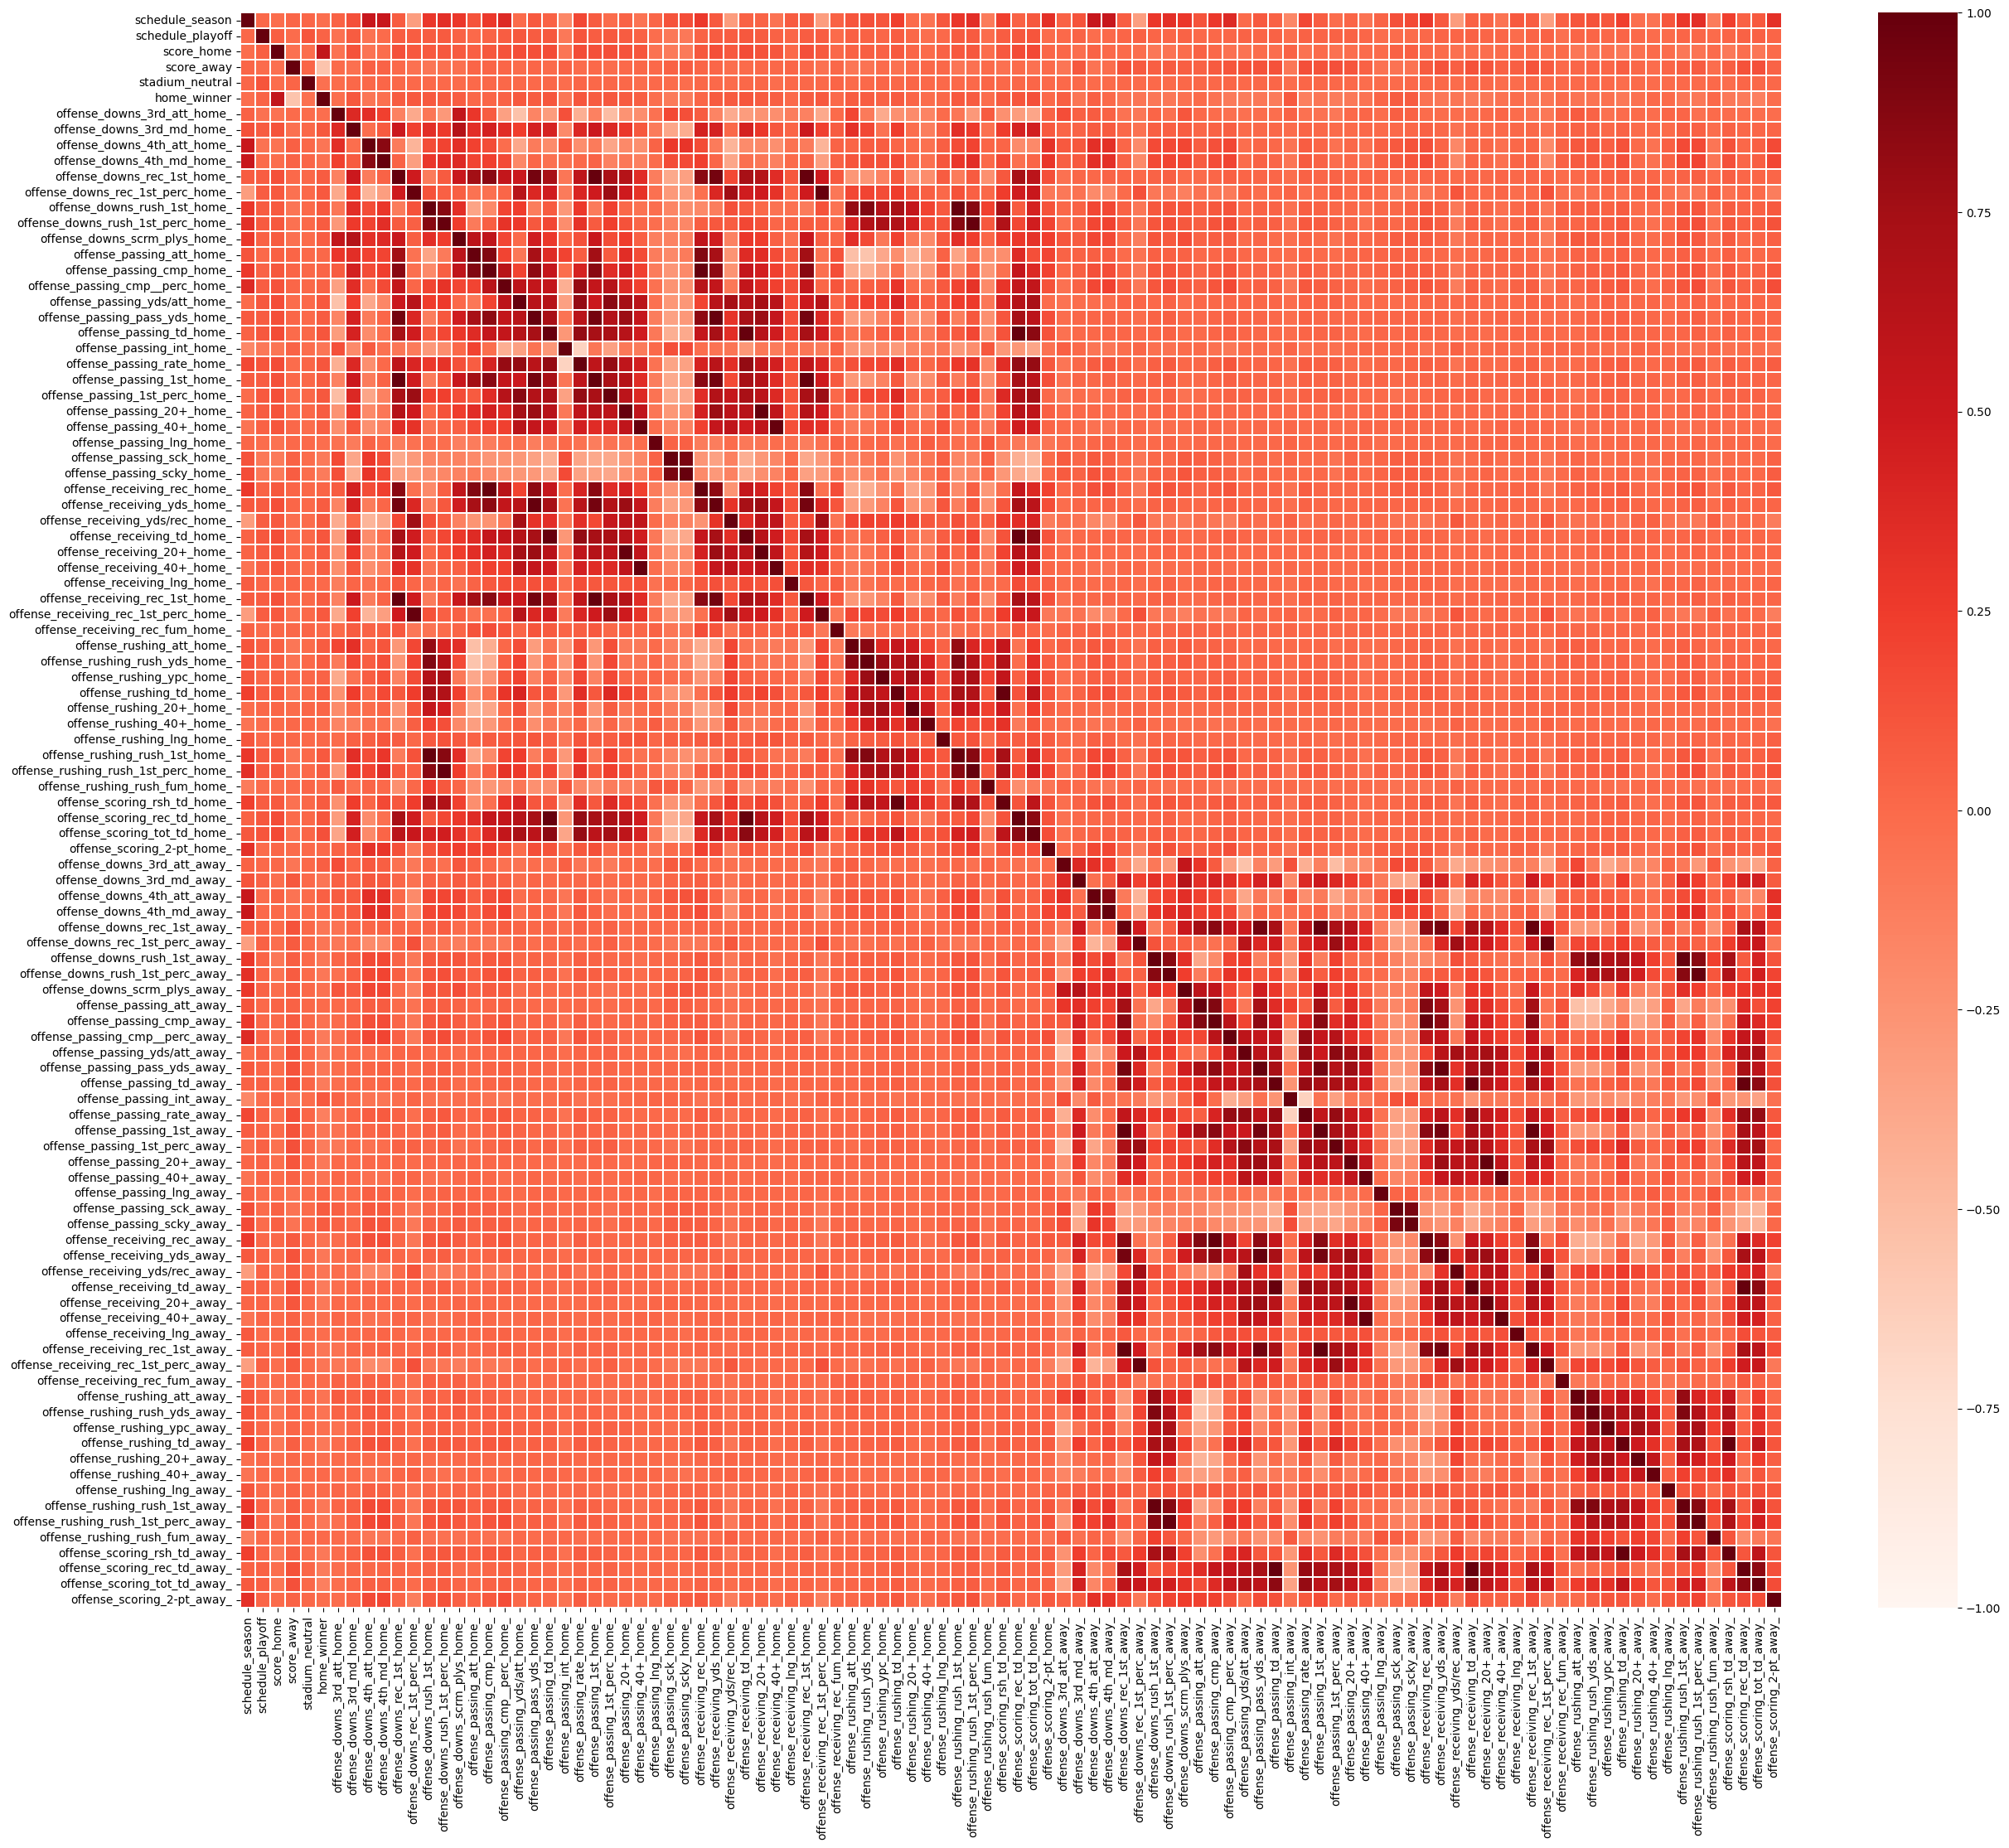

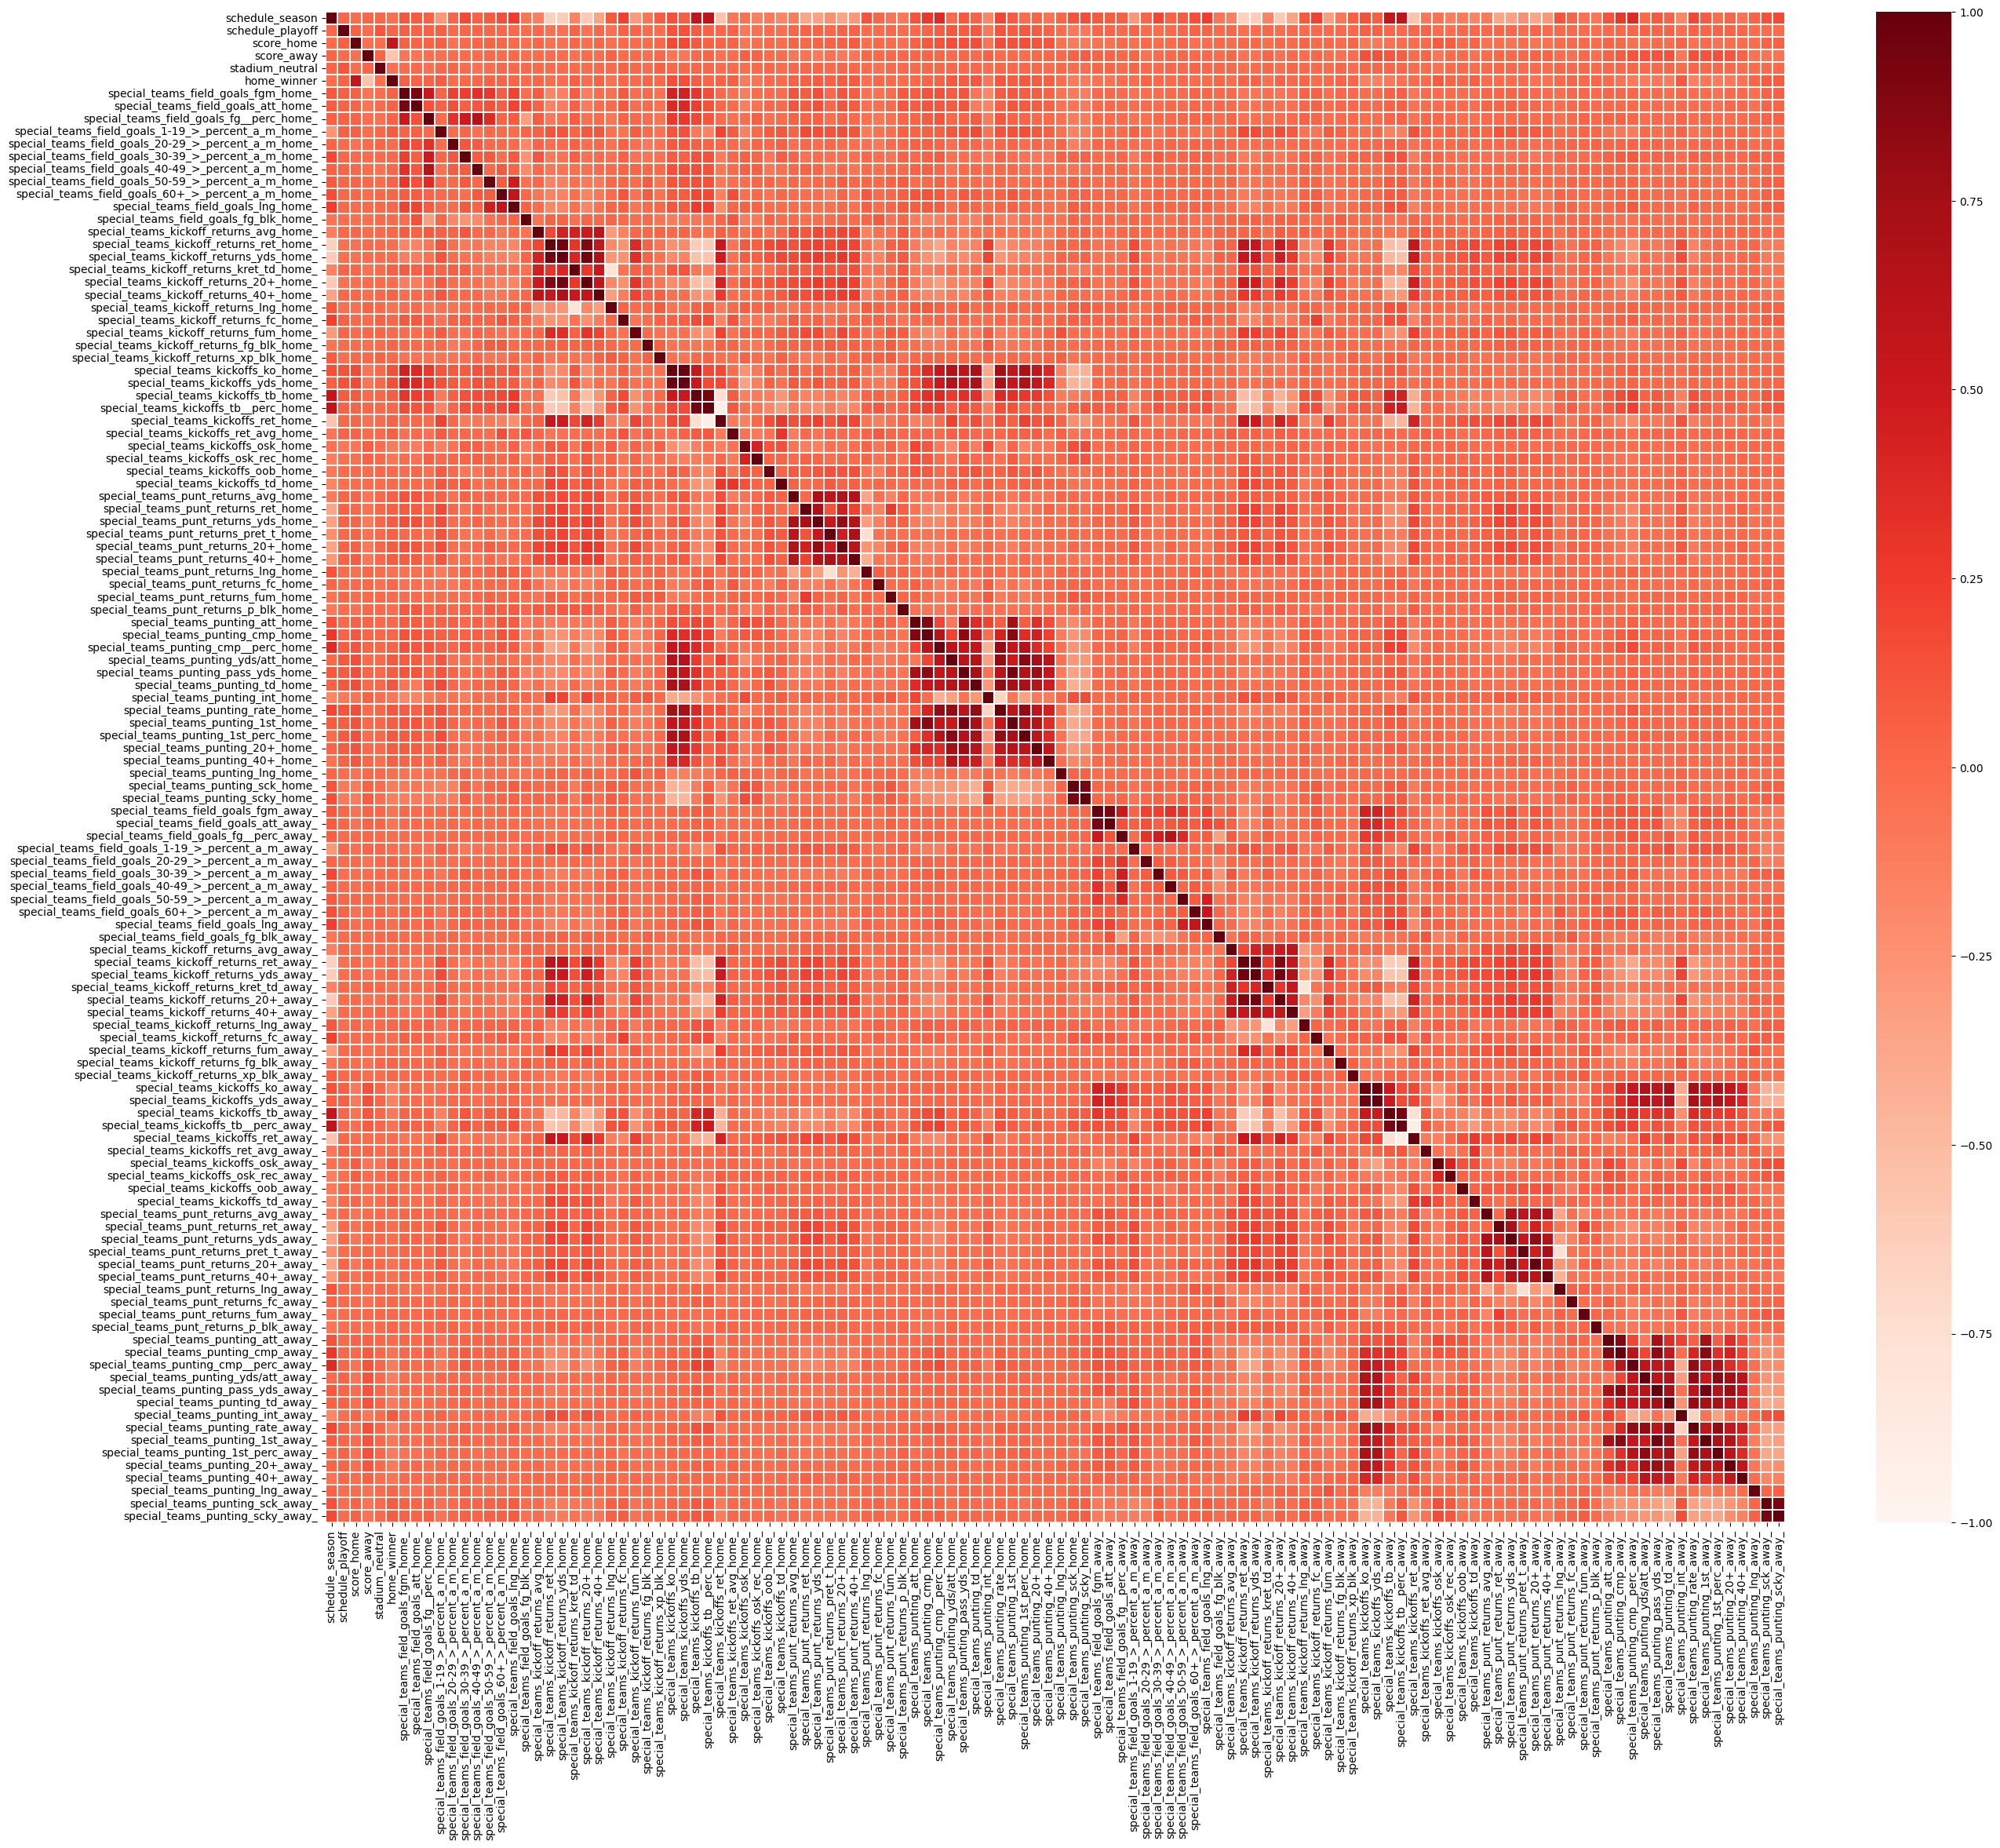

In [8]:
def get_columns(theme, columns):
  new_list = ['schedule_date', 'schedule_season', 'schedule_playoff', 'team_home',
              'score_home', 'score_away', 'team_away', 'stadium_neutral',
              'home_winner']
  for column in columns:
    if theme in column:
      new_list.append(column)
  return new_list

columns = games_score_df.columns

themes = ['defense', 'offense', 'special_teams']
for theme in themes:
  plt.figure(figsize=(30,25))
  sns.heatmap(
      data=games_score_df[get_columns(theme, columns)].corr(numeric_only=True),
      vmin=-1,
      vmax=1,
      linewidths=0.1,
      # annot=True,
      # cmap="YlOrBr"
      cmap="Reds"
  )
  plt.show()

In [9]:
corr_df = games_score_df.corr(numeric_only=True)['home_winner']
corr_df.describe()

count    339.000000
mean       0.003201
std        0.090596
min       -0.561660
25%       -0.039299
50%        0.000518
75%        0.043419
max        1.000000
Name: home_winner, dtype: float64

In [10]:
corr_list = [*corr_df[
                (corr_df >= 0.1) |
                (corr_df <= -0.1)
            ].index]

In [11]:
high_corr_df = games_score_df[corr_list]

## Time series

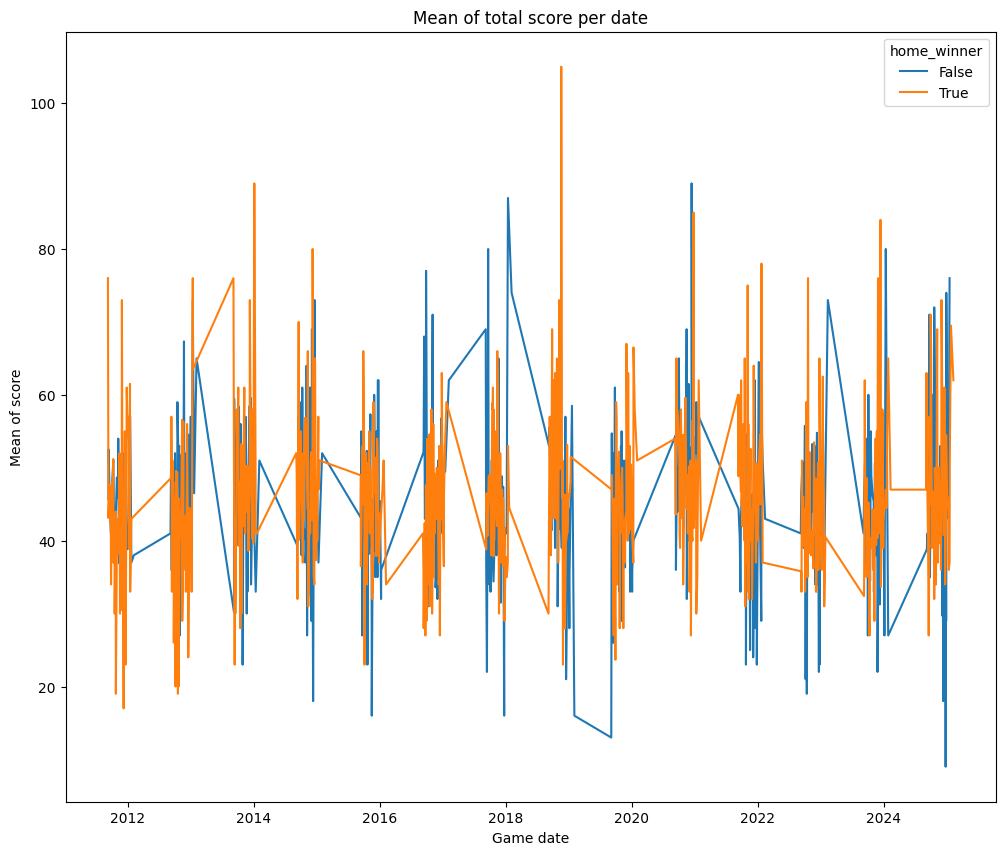

In [12]:
df = games_score_df[['schedule_date',
                     'home_winner',
                     'total_score']].groupby(['schedule_date',
                                              'home_winner'], as_index=False).mean()

plt.figure(figsize=(12,10))
sns.lineplot(
    data=df,
    x='schedule_date',
    y='total_score',
    hue='home_winner'
)
plt.title('Mean of total score per date')
plt.ylabel('Mean of score')
plt.xlabel('Game date')
plt.show()

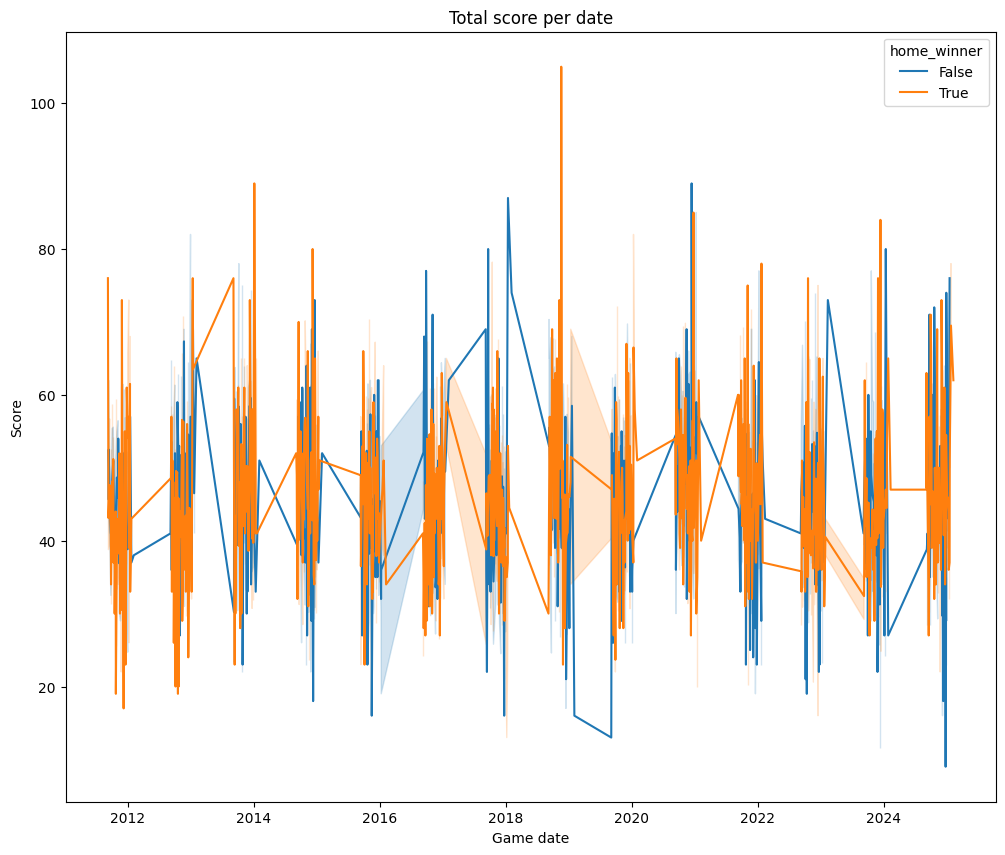

In [13]:
plt.figure(figsize=(12,10))
sns.lineplot(
    data=games_score_df,
    x='schedule_date',
    y='total_score',
    hue='home_winner'
)
plt.title('Total score per date')
plt.ylabel('Score')
plt.xlabel('Game date')
plt.show()

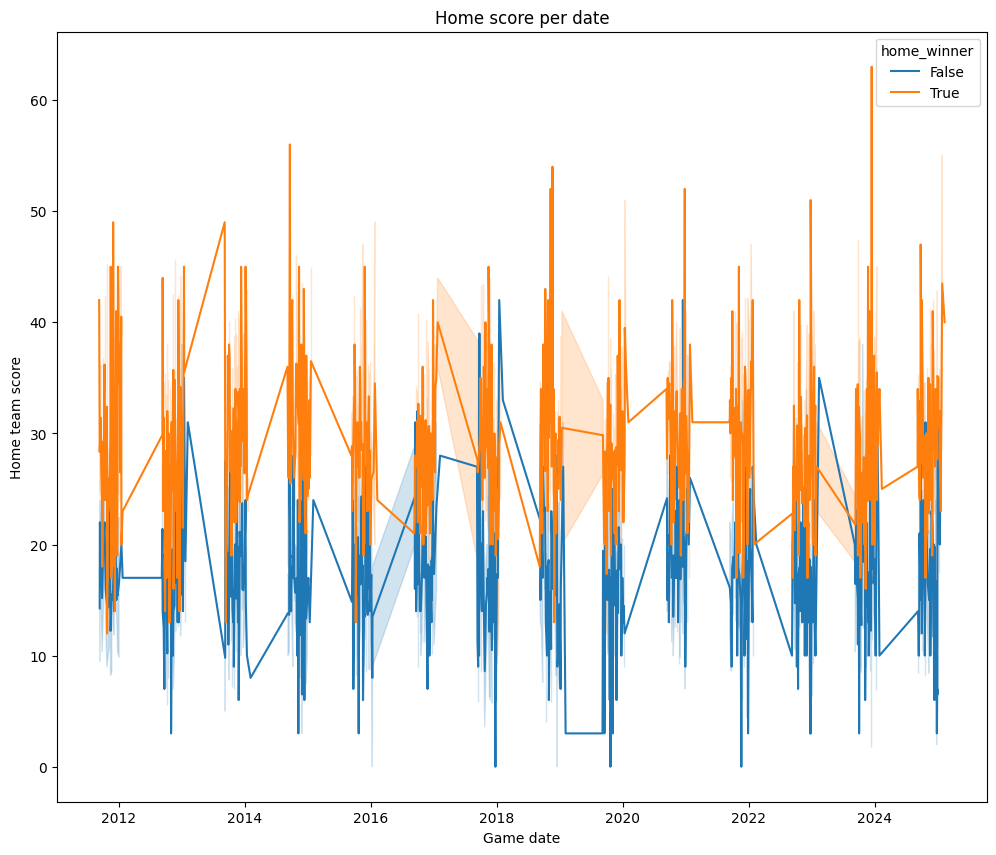

In [14]:
plt.figure(figsize=(12,10))
sns.lineplot(
    data=games_score_df,
    x='schedule_date',
    y='score_home',
    hue='home_winner'
)
plt.title('Home score per date')
plt.ylabel('Home team score')
plt.xlabel('Game date')
plt.show()

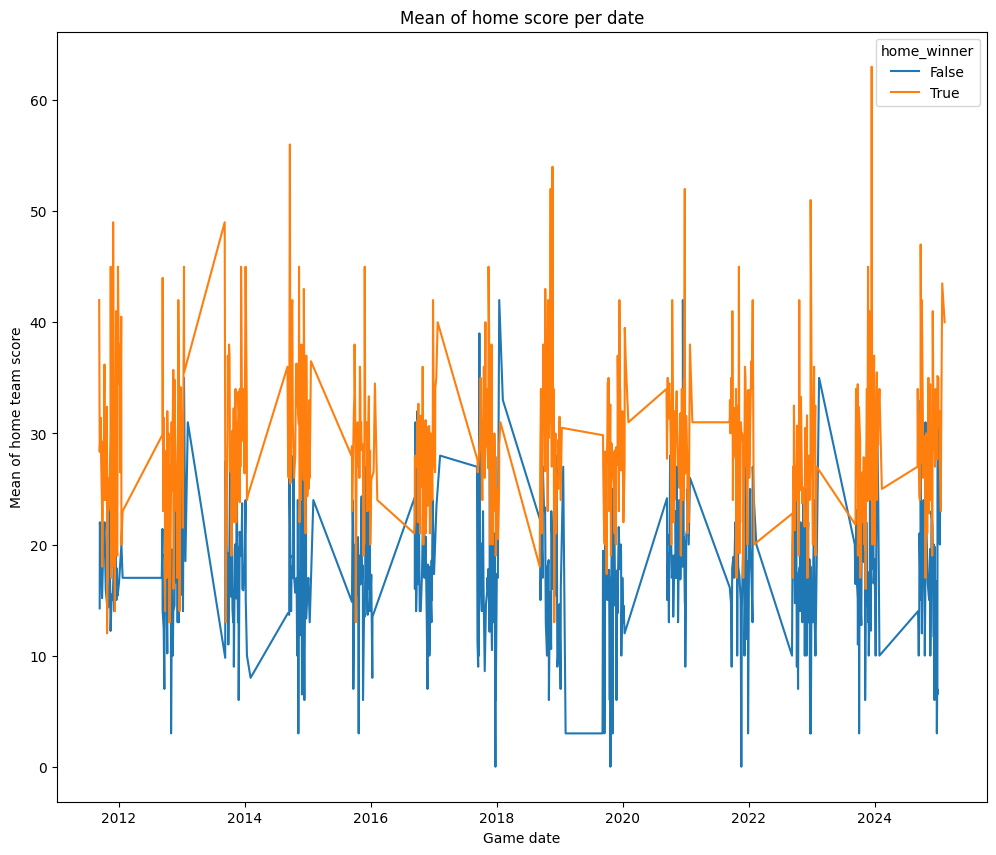

In [15]:
df = games_score_df[['schedule_date',
                     'home_winner',
                     'score_home']].groupby(['schedule_date',
                                             'home_winner'], as_index=False).mean()

plt.figure(figsize=(12,10))
sns.lineplot(
    data=df,
    x='schedule_date',
    y='score_home',
    hue='home_winner'
)
plt.title('Mean of home score per date')
plt.ylabel('Mean of home team score')
plt.xlabel('Game date')
plt.show()

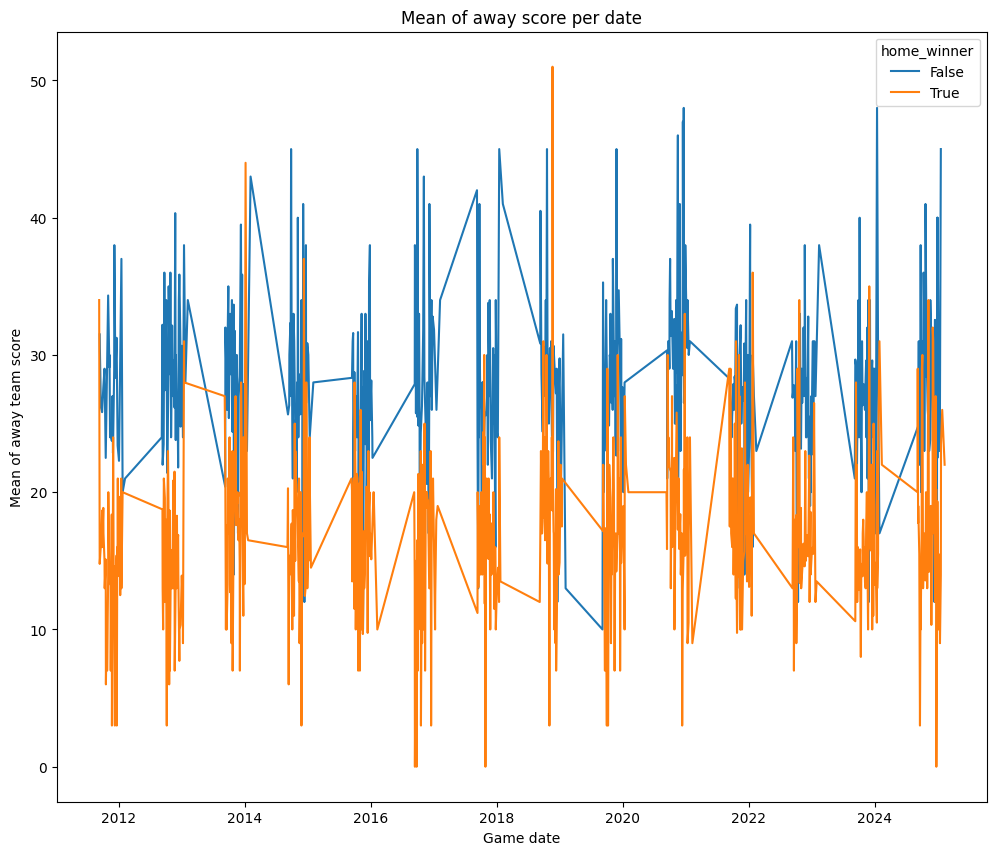

In [16]:
df = games_score_df[['schedule_date',
                     'home_winner',
                     'score_away']].groupby(['schedule_date',
                                             'home_winner'], as_index=False).mean()

plt.figure(figsize=(12,10))
sns.lineplot(
    data=df,
    x='schedule_date',
    y='score_away',
    hue='home_winner'
)
plt.title('Mean of away score per date')
plt.ylabel('Mean of away team score')
plt.xlabel('Game date')
plt.show()

## Distribuition

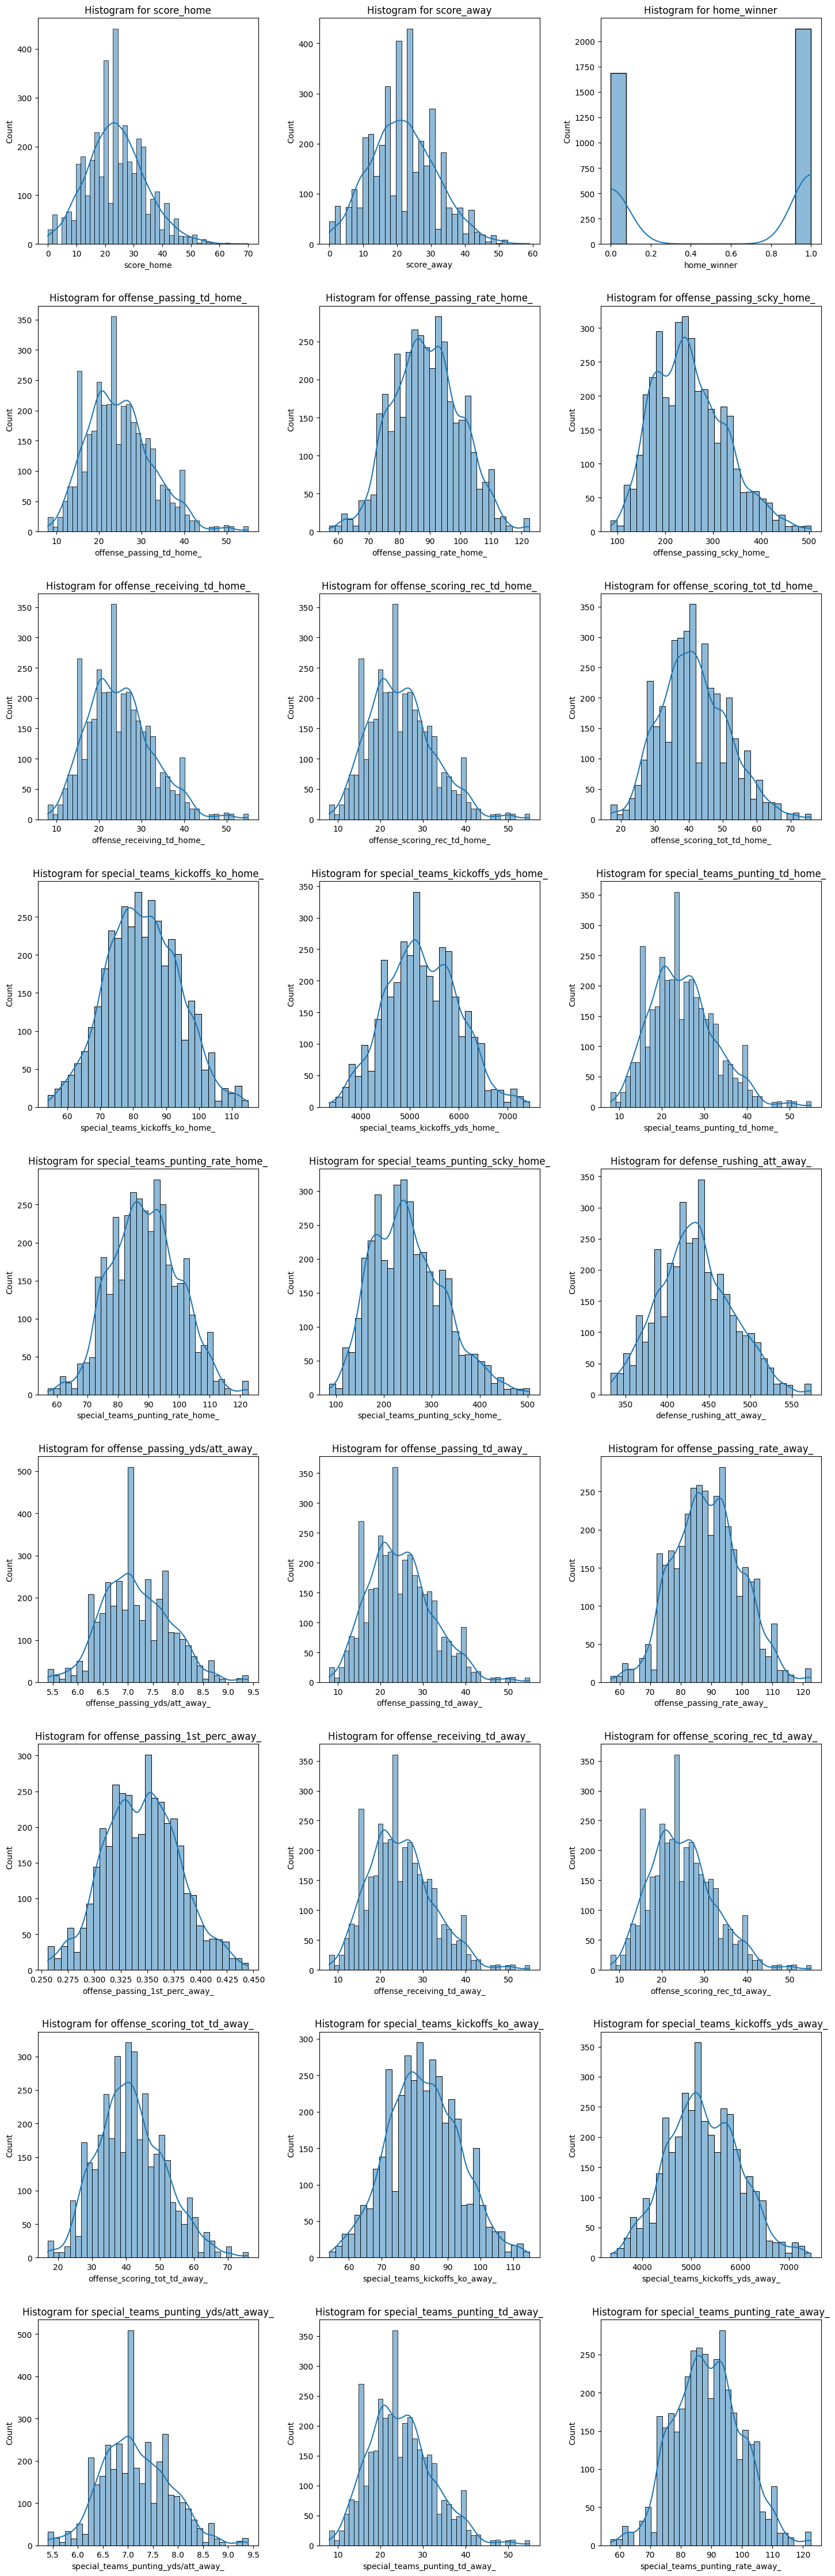

In [17]:
num_cols = 3
num_rows = (len(corr_list) - 1) // num_cols + 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easy indexing

for i in range(0, len(high_corr_df.columns) - 1):
    col = high_corr_df.columns[i]

    sns.histplot(
        high_corr_df[col],
        kde=True,
        ax=axes[i]
    )
    axes[i].set_title(f'Histogram for {col}', fontsize=12)

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout(pad=3.0)
plt.show()

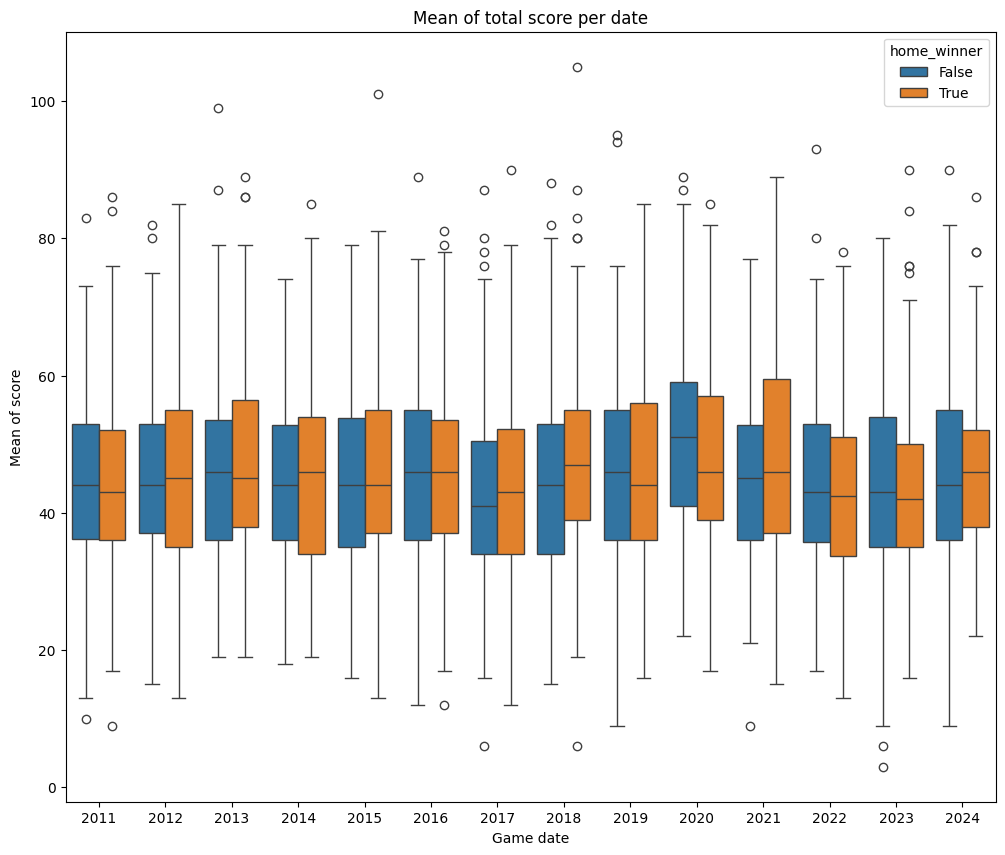

In [18]:
plt.figure(figsize=(12,10))
sns.boxplot(
    data=games_score_df,
    x='schedule_season',
    y='total_score',
    hue='home_winner'
)
plt.title('Mean of total score per date')
plt.ylabel('Mean of score')
plt.xlabel('Game date')
plt.show()

## Dispersion

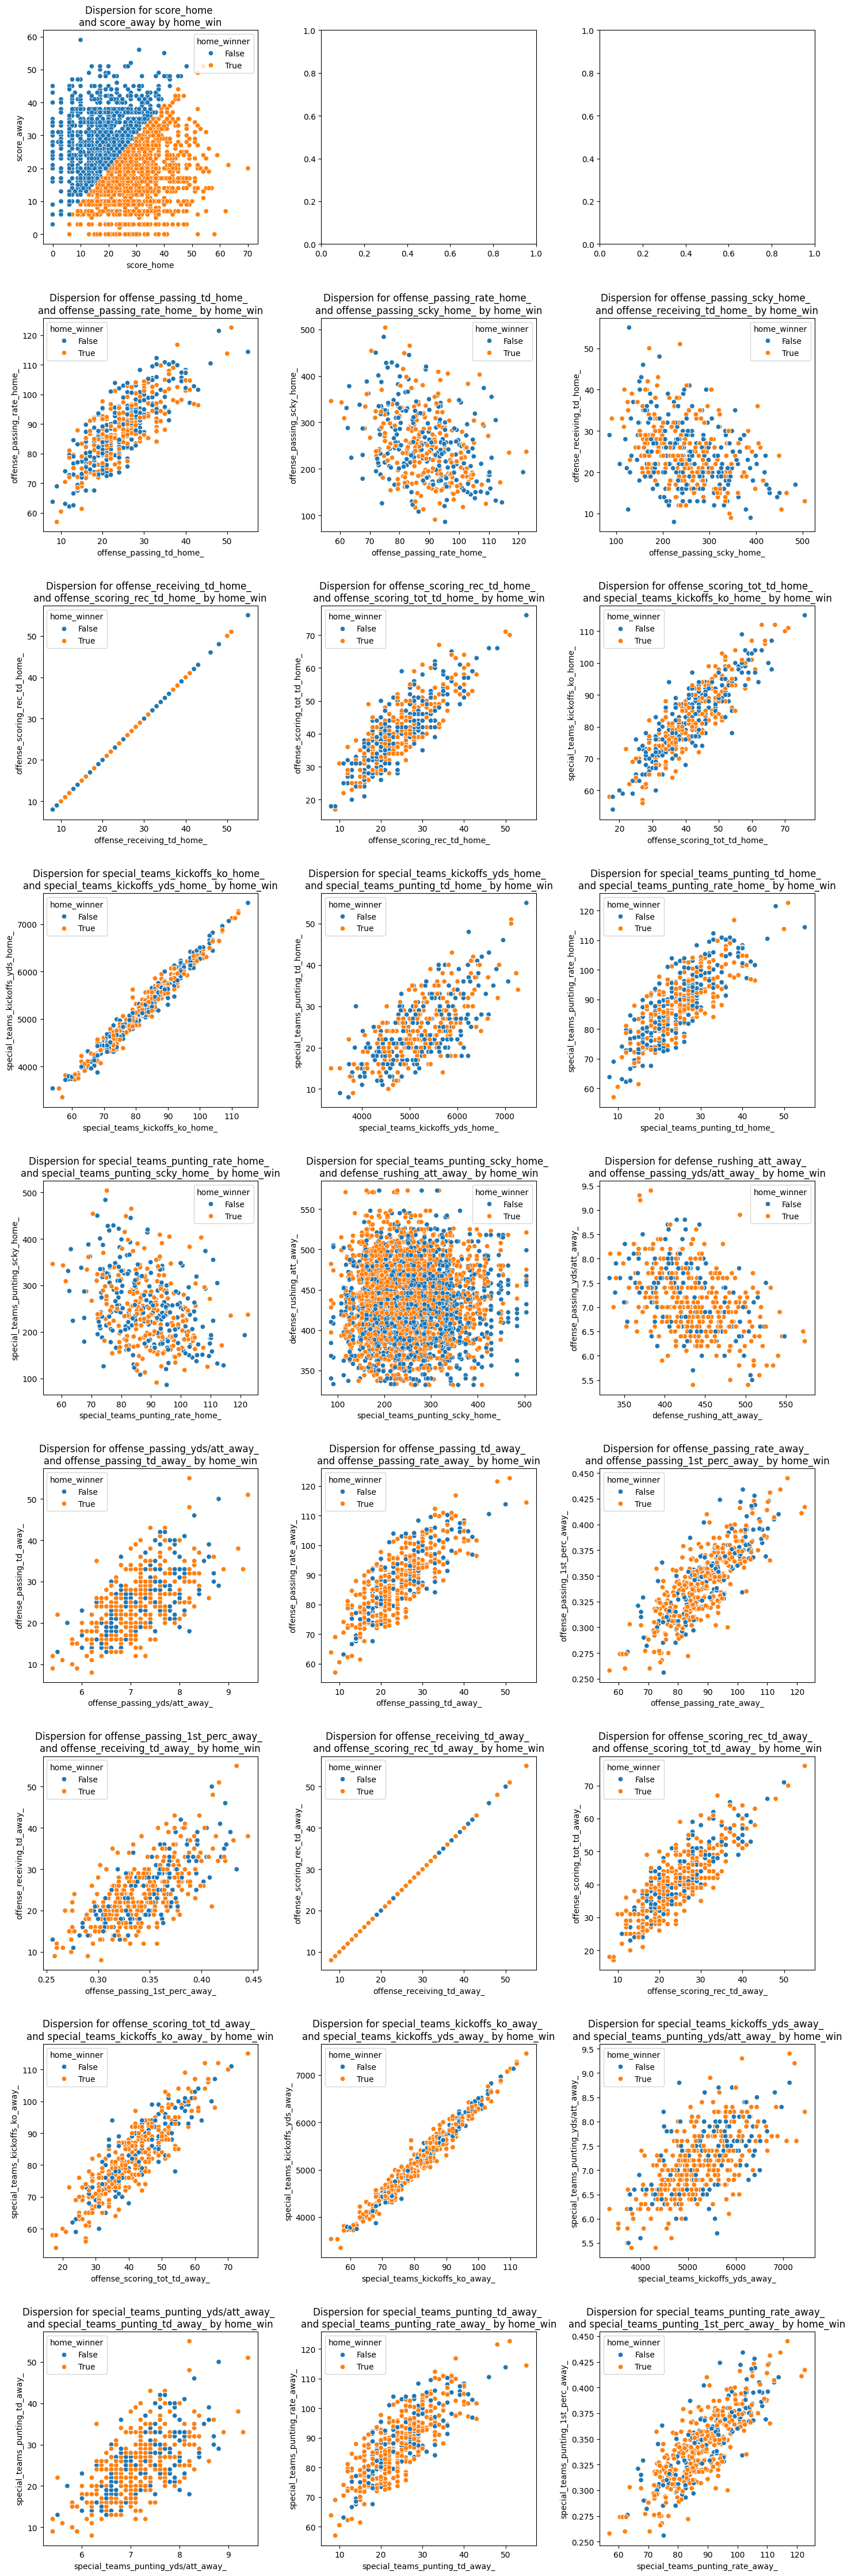

In [19]:
num_cols = 3
num_rows = (len(corr_list) - 1) // num_cols + 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easy indexing

for i in range(0, len(high_corr_df.columns) - 1):
    col1 = high_corr_df.columns[i]
    col2 = high_corr_df.columns[i + 1]

    if col1 != 'home_winner' and col2 != 'home_winner':
        sns.scatterplot(
            data=high_corr_df,
            x=col1,
            y=col2,
            hue='home_winner',
            ax=axes[i]
        )
        axes[i].set_title(f'Dispersion for {col1} \nand {col2} by home_win', fontsize=12)

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout(pad=3.0)
plt.show()

## Creating treated DF

In [20]:
# treated_df = games_score_df.drop(columns=to_remove_list)
# treated_df.head()

In [21]:
treated_df = games_score_df.copy()

In [22]:
treated_df.to_parquet('treated_df.parquet')